In [1]:
!pip install tensorflow scikit-learn matplotlib pandas

In [2]:
!pip install pillow

In [3]:
!pip install kaggle

In [8]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [9]:
! cp kaggle.json ~/.kaggle/


In [10]:
! chmod 600 ~/.kaggle/kaggle.json


In [11]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

 98% 601M/612M [00:03<00:00, 218MB/s]
100% 612M/612M [00:03<00:00, 198MB/s]


In [14]:
!unzip /content/gtsrb-german-traffic-sign.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/5/00005_00053_00010.png  
  inflating: train/5/00005_00053_00011.png  
  inflating: train/5/00005_00053_00012.png  
  inflating: train/5/00005_00053_00013.png  
  inflating: train/5/00005_00053_00014.png  
  inflating: train/5/00005_00053_00015.png  
  inflating: train/5/00005_00053_00016.png  
  inflating: train/5/00005_00053_00017.png  
  inflating: train/5/00005_00053_00018.png  
  inflating: train/5/00005_00053_00019.png  
  inflating: train/5/00005_00053_00020.png  
  inflating: train/5/00005_00053_00021.png  
  inflating: train/5/00005_00053_00022.png  
  inflating: train/5/00005_00053_00023.png  
  inflating: train/5/00005_00053_00024.png  
  inflating: train/5/00005_00053_00025.png  
  inflating: train/5/00005_00053_00026.png  
  inflating: train/5/00005_00053_00027.png  
  inflating: train/5/00005_00053_00028.png  
  inflating: train/5/00005_00053_00029.png  
  inflating: train/5/00005_00054_00000.png  
  in

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [13]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()


In [15]:
cur_path

'/content'

In [18]:
#Retrieving the images and their labels
for i in range(classes):
    path = os.path.join(cur_path,'Train',str(i))
    images = os.listdir(path)

    for a in images:

          image = Image.open(path + '/'+ a)
          image = image.resize((30,30))
          image = np.array(image)
          #sim = Image.fromarray(image)
          data.append(image)
          labels.append(i)


In [19]:
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

In [20]:
print(data.shape, labels.shape)


(39209, 30, 30, 3) (39209,)


In [21]:
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [22]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [23]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [24]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2  (None, 11, 11, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

In [25]:
# Train the model
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

Epoch 1/15
981/981 [==============================] - 20s 8ms/step - loss: 1.9123 - accuracy: 0.5156 - val_loss: 0.4247 - val_accuracy: 0.8984
Epoch 2/15
981/981 [==============================] - 7s 7ms/step - loss: 0.6723 - accuracy: 0.8072 - val_loss: 0.1959 - val_accuracy: 0.9499
Epoch 3/15
981/981 [==============================] - 6s 6ms/step - loss: 0.4824 - accuracy: 0.8560 - val_loss: 0.1842 - val_accuracy: 0.9464
Epoch 4/15
981/981 [==============================] - 5s 5ms/step - loss: 0.3930 - accuracy: 0.8838 - val_loss: 0.1208 - val_accuracy: 0.9684
Epoch 5/15
981/981 [==============================] - 7s 7ms/step - loss: 0.3607 - accuracy: 0.8952 - val_loss: 0.1020 - val_accuracy: 0.9714
Epoch 6/15
981/981 [==============================] - 7s 7ms/step - loss: 0.3316 - accuracy: 0.9042 - val_loss: 0.0879 - val_accuracy: 0.9726
Epoch 7/15
981/981 [==============================] - 10s 11ms/step - loss: 0.3014 - accuracy: 0.9131 - val_loss: 0.0872 - val_accuracy: 0.9777
Epo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


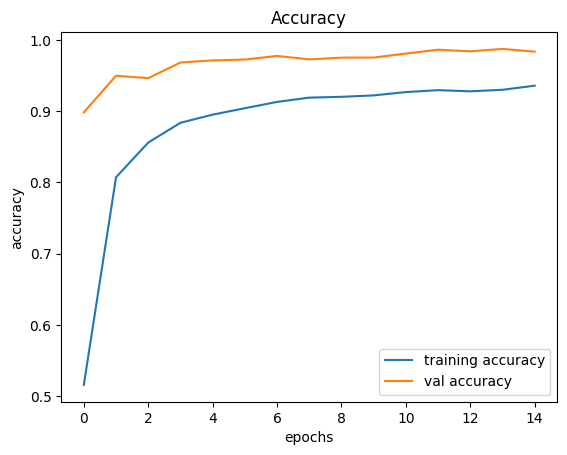

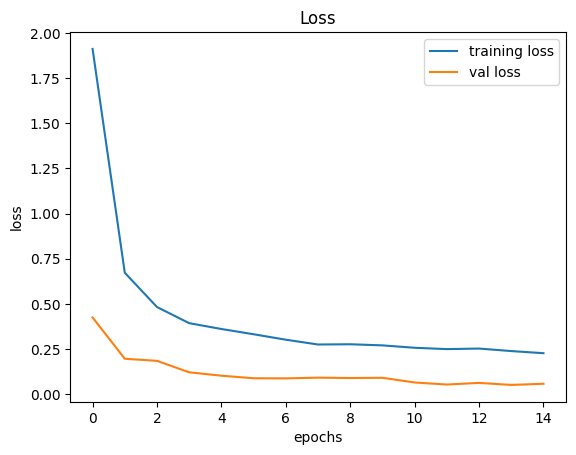

In [26]:
#plotting graphs for accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [33]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score

y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

pred = model.predict(X_test)
predictions = []
for val in pred:
  predictions.append(np.argmax(val))

#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, predictions))



395/395 [==============================] - 1s 3ms/step
0.9428345209817894


In [34]:
!zip /content/my_model.zip /content/my_model.h5

  adding: content/my_model.h5 (deflated 10%)
